In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn3, venn3_circles
import re
import numpy as np

In [2]:
#import files
A1101_psm_OK_MSF = pd.read_csv('/home/sara/HLA/OK_MSfragger_filtered/filtered_target_psm_A1101.csv')
A1101_psm_MSB = pd.read_csv('/home/sara/HLA/MSB Concat_and_Filtered/MSB_A1101_filtered.csv')

In [3]:
A1101_psm_OK_MSF.head(15)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,0,AC20171011_Broad_HLA_A1101_R1_Rep02-3085-RVYDP...,2.05516,0.000171,6.901180e-08,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
1,1,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_01-121...,1.97562,0.000171,1.151810e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
2,2,AC20171011_Broad_HLA_A1101_R1_Rep01-3121-RVYDP...,1.94197,0.000171,1.430560e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
3,3,AC20171011_Broad_HLA_A1101_R2_Rep02-3055-RVYDP...,1.93092,0.000171,1.536090e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
4,4,AC20171011_Broad_HLA_A1101_R1_Rep02-6653-ISDPT...,1.83280,0.000171,2.889660e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
5,5,AC20171011_Broad_HLA_A1101_R2_Rep01-3102-RVYDP...,1.80707,0.000171,3.410490e-07,_.RVYDPASPQRR._,RVYDPASPQRR,RVYDPASPQRR
6,6,YE_20180517_SK_HLA_A1101_3IPs_a50mio_R1_01-122...,1.80214,0.000171,3.520650e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
7,7,AC20171011_Broad_HLA_A1101_R2_Rep01-6623-ISDPT...,1.79232,0.000171,3.750410e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
8,8,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R1_02-125...,1.70673,0.000171,6.508520e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR
9,9,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02-119...,1.65410,0.000171,9.134280e-07,_.ISDPTSPLRTR._,ISDPTSPLRTR,ISDPTSPLRTR


In [4]:
A1101_psm_MSB.tail(15)

,Unnamed: 0,PSMId,score,q-value,posterior_error_prob,peptide,modi_peptide,modi_peptide_2
46584,59197,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.227...,0.014095,0.008977,0.200315,L.TIAASLAFK.S,TIAASLAFK,TIAASLAFK
46585,59198,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.591...,0.012727,0.008977,0.201999,G.GTGKTTFVK.R,GTGKTTFVK,GTGKTTFVK
46586,59199,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.228...,0.012278,0.008977,0.202552,S.LDKRVILIFH.C,LDKRVILIFH,LDKRVILIFH
46587,59200,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.656...,0.011725,0.008977,0.203237,K.RISSNPVAK.I,RISSNPVAK,RISSNPVAK
46588,59201,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.539...,0.010605,0.008977,0.204629,T.GTGKSVYVK.D,GTGKSVYVK,GTGKSVYVK
46589,59202,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.809...,0.010363,0.008977,0.204930,I.AAATSVLKT.R,AAATSVLKT,AAATSVLKT
46590,59203,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.157...,0.009821,0.008977,0.205607,L.QAVLLM[15.9949]STDRSGL.L,QAVLLM[15.9949]STDRSGL,QAVLLMSTDRSGL
46591,59204,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.179...,0.004841,0.009135,0.211895,S.LFHPSNVEM.L,LFHPSNVEM,LFHPSNVEM
46592,59205,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.189...,0.004738,0.009135,0.212025,R.AVQEFGLARFK.S,AVQEFGLARFK,AVQEFGLARFK
46593,59206,YE_20180517_SK_HLA_A1101_3Ips_a50mio_R2_02.104...,0.004233,0.009135,0.212671,M.PFSAGKR.M,PFSAGKR,PFSAGKR


Text(0.5, 1.0, 'Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on the psm level)')

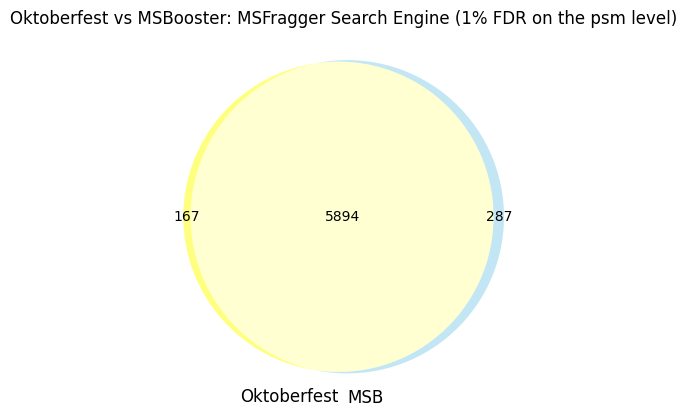

In [5]:
venn2(
      [set(A1101_psm_OK_MSF['modi_peptide'].to_list()), 
       set(A1101_psm_MSB['modi_peptide_2'].to_list())],
       set_labels=('Oktoberfest', 'MSB'),
       set_colors = ('yellow', 'skyblue'),
       alpha = 0.5
     )

plt.title("Oktoberfest vs MSBooster: MSFragger Search Engine (1% FDR on the psm level)")

# Stacked bar plot

In [66]:
#SE = pd.read_csv ('/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/msms.txt')
percolator_output_andro = pd.read_csv('/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/results/percolator/original_target.psms', sep= '\t')
percolator_output_prosit = pd.read_csv("/home/sara/Metaproteomics/forKarim/sprot_all/sprot_all_Oktoberfest_MSFragger/results/percolator/rescore_target.psms", sep= '\t')


In [67]:
percolator_output_andro

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds
0,02406_D04_P026035_B00_A00_R1-18289-VPLQQNFQDNQ...,3.76719,0.000298,7.227510e-09,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK
1,02406_G01_P026014_B00_A00_R1-7983-HYAHVDC[UNIM...,3.73884,0.000298,8.058470e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
2,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,3.62549,0.000298,1.245140e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
3,02406_G01_P026014_B00_A00_R1-18233-VPLQQNFQDNQ...,3.49444,0.000298,2.059190e-08,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK
4,02406_D01_P026011_B00_A00_R1-8106-HYAHVDC[UNIM...,3.45021,0.000298,2.440250e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
...,...,...,...,...,...,...
104550,02406_D01_P026011_B00_A00_R1-4363-GPGERAGGGGDA...,-2.04614,0.734952,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK
104551,02404_F02_P025829_B00_A00_R1-14814-GPGERAGGGGD...,-2.09486,0.734972,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK
104552,02405_C04_P025938_B00_A00_R1-39268-M[UNIMOD:35...,-2.09850,0.734972,1.000000e+00,_.M[UNIMOD:35]LGLGRVFSSAVRPR._,M[UNIMOD:35]LGLGRVFSSAVRPR
104553,02406_F03_P026029_B00_A00_R1-8935-DKSNTSASSTEM...,-2.10234,0.734972,1.000000e+00,_.DKSNTSASSTEMVNK._,DKSNTSASSTEMVNK


In [72]:
#add a new column where you will clean the peptide column in it / leave the original as it is 
percolator_output_andro["modi_peptide"] = percolator_output_andro['peptide']

#rename the dataframe 
filt_andro = percolator_output_andro

#clean the modi_peptide column
filt_andro['modi_peptide'] = filt_andro['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
filt_andro['modi_peptide'] = filt_andro['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)

filt_andro

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,02406_D04_P026035_B00_A00_R1-18289-VPLQQNFQDNQ...,3.76719,0.000298,7.227510e-09,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK,VPLQQNFQDNQFQGK
1,02406_G01_P026014_B00_A00_R1-7983-HYAHVDC[UNIM...,3.73884,0.000298,8.058470e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
2,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,3.62549,0.000298,1.245140e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
3,02406_G01_P026014_B00_A00_R1-18233-VPLQQNFQDNQ...,3.49444,0.000298,2.059190e-08,_.VPLQQNFQDNQFQGK._,VPLQQNFQDNQFQGK,VPLQQNFQDNQFQGK
4,02406_D01_P026011_B00_A00_R1-8106-HYAHVDC[UNIM...,3.45021,0.000298,2.440250e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK
...,...,...,...,...,...,...,...
104550,02406_D01_P026011_B00_A00_R1-4363-GPGERAGGGGDA...,-2.04614,0.734952,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK,GPGERAGGGGDAGK
104551,02404_F02_P025829_B00_A00_R1-14814-GPGERAGGGGD...,-2.09486,0.734972,1.000000e+00,_.GPGERAGGGGDAGK._,GPGERAGGGGDAGK,GPGERAGGGGDAGK
104552,02405_C04_P025938_B00_A00_R1-39268-M[UNIMOD:35...,-2.09850,0.734972,1.000000e+00,_.M[UNIMOD:35]LGLGRVFSSAVRPR._,M[UNIMOD:35]LGLGRVFSSAVRPR,MLGLGRVFSSAVRPR
104553,02406_F03_P026029_B00_A00_R1-8935-DKSNTSASSTEM...,-2.10234,0.734972,1.000000e+00,_.DKSNTSASSTEMVNK._,DKSNTSASSTEMVNK,DKSNTSASSTEMVNK


In [73]:
percolator_output_prosit

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds
0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.35929,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.31420,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.26389,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
...,...,...,...,...,...,...
104550,02405_E08_P025972_B00_A00_R1-6005-TIETYLFAMFDE...,-3.71636,0.734964,1.000000e+00,_.TIETYLFAMFDENRK._,TIETYLFAMFDENRK
104551,02406_D01_P026011_B00_A00_R1-5998-LYSYIQQFLYKE...,-3.73130,0.734964,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK
104552,02405_E01_P025916_B00_A00_R1-6221-LYSYIQQFLYKE...,-3.80823,0.734969,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK
104553,02405_E01_P025916_B00_A00_R1-5750-TAFALEKGFFGM...,-3.92852,0.734969,1.000000e+00,_.TAFALEKGFFGM[UNIMOD:35]LAK._,TAFALEKGFFGM[UNIMOD:35]LAK


In [76]:
#add new column to clean peptides in it
percolator_output_prosit["modi_peptide"] = percolator_output_prosit['peptide']

#rename the dataframe 
filt_prosit = percolator_output_prosit
filt_prosit

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide
0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,_.HYAHVDC[UNIMOD:4]PGHADYVK._
1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,_.HYAHVDC[UNIMOD:4]PGHADYVK._
2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.35929,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,_.LQHLENELTHDIITK._
3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.31420,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,_.LQHLENELTHDIITK._
4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.26389,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,_.HYAHVDC[UNIMOD:4]PGHADYVK._
...,...,...,...,...,...,...,...
104550,02405_E08_P025972_B00_A00_R1-6005-TIETYLFAMFDE...,-3.71636,0.734964,1.000000e+00,_.TIETYLFAMFDENRK._,TIETYLFAMFDENRK,_.TIETYLFAMFDENRK._
104551,02406_D01_P026011_B00_A00_R1-5998-LYSYIQQFLYKE...,-3.73130,0.734964,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK,_.LYSYIQQFLYKENSK._
104552,02405_E01_P025916_B00_A00_R1-6221-LYSYIQQFLYKE...,-3.80823,0.734969,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK,_.LYSYIQQFLYKENSK._
104553,02405_E01_P025916_B00_A00_R1-5750-TAFALEKGFFGM...,-3.92852,0.734969,1.000000e+00,_.TAFALEKGFFGM[UNIMOD:35]LAK._,TAFALEKGFFGM[UNIMOD:35]LAK,_.TAFALEKGFFGM[UNIMOD:35]LAK._


In [77]:
#clean the modi_peptide column
filt_prosit['modi_peptide'] = filt_prosit['modi_peptide'].str.replace(r'[_,.:,\d]+', '', regex=True)
filt_prosit['modi_peptide'] = filt_prosit['modi_peptide'].str.replace(r'\[UNIMOD\]', '', regex= True)
filt_prosit['pep_length'] = filt_prosit['modi_peptide'].str.len()
filt_prosit

,PSMId,score,q-value,posterior_error_prob,peptide,proteinIds,modi_peptide,pep_length
0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.37970,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.35929,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.31420,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15
4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.26389,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15
...,...,...,...,...,...,...,...,...
104550,02405_E08_P025972_B00_A00_R1-6005-TIETYLFAMFDE...,-3.71636,0.734964,1.000000e+00,_.TIETYLFAMFDENRK._,TIETYLFAMFDENRK,TIETYLFAMFDENRK,15
104551,02406_D01_P026011_B00_A00_R1-5998-LYSYIQQFLYKE...,-3.73130,0.734964,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK,LYSYIQQFLYKENSK,15
104552,02405_E01_P025916_B00_A00_R1-6221-LYSYIQQFLYKE...,-3.80823,0.734969,1.000000e+00,_.LYSYIQQFLYKENSK._,LYSYIQQFLYKENSK,LYSYIQQFLYKENSK,15
104553,02405_E01_P025916_B00_A00_R1-5750-TAFALEKGFFGM...,-3.92852,0.734969,1.000000e+00,_.TAFALEKGFFGM[UNIMOD:35]LAK._,TAFALEKGFFGM[UNIMOD:35]LAK,TAFALEKGFFGMLAK,15


In [103]:
#filtered to 1% FDR
filt_prosit = filt_prosit[filt_prosit['q-value'] <= 0.01]

filt_andro = filt_andro[filt_andro['q-value']<=0.01]

In [121]:
# unique peptides to the andromeda_target (percolator target output for rescoring without peptide property prediction) 
lost = ~filt_andro['modi_peptide'].isin(filt_prosit['modi_peptide'])
lost

0        False
1        False
2        False
3        False
4        False
         ...  
14132    False
14133    False
14134    False
14135     True
14136    False
Name: modi_peptide, Length: 14137, dtype: bool

In [122]:
lost_count = lost.value_counts()

# Access the counts
true_count = lost_count.get(True, 0)
false_count = lost_count.get(False, 0)

print("True count:", true_count)
print("False count:", false_count)

True count: 243
False count: 13894


In [123]:
#unique peptides to the prosit_target (percolator target output for rescoring with peptide property prediction)
gained = ~filt_prosit['modi_peptide'].isin(filt_andro['modi_peptide'])
gained

0        False
1        False
2        False
3        False
4        False
         ...  
24583     True
24584     True
24585     True
24586     True
24587     True
Name: modi_peptide, Length: 24588, dtype: bool

In [124]:
gained_count = gained.value_counts()

# Access the counts
true_count = gained_count.get(True, 0)
false_count = gained_count.get(False, 0)

print("True count:", true_count)
print("False count:", false_count)

True count: 7356
False count: 17232


In [125]:
# common peptides
common = filt_prosit.merge(filt_andro, how="inner", on=['modi_peptide','PSMId'])
common

,PSMId,score_x,q-value_x,posterior_error_prob_x,peptide_x,proteinIds_x,modi_peptide,pep_length,score_y,q-value_y,posterior_error_prob_y,peptide_y,proteinIds_y
0,02406_D01_P026011_B00_A00_R1-8145-HYAHVDC[UNIM...,1.379700,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,2.787500,0.000298,3.106390e-07,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
1,02405_E01_P025916_B00_A00_R1-8497-HYAHVDC[UNIM...,1.379700,0.000074,4.836720e-09,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,3.352950,0.000298,3.544620e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
2,02406_D01_P026011_B00_A00_R1-19882-LQHLENELTHD...,1.359290,0.000074,6.257380e-09,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,3.437850,0.000298,2.558840e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
3,02406_D04_P026035_B00_A00_R1-19695-LQHLENELTHD...,1.314200,0.000074,1.105390e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK,LQHLENELTHDIITK,15,3.153290,0.000298,7.628290e-08,_.LQHLENELTHDIITK._,LQHLENELTHDIITK
4,02405_E08_P025972_B00_A00_R1-8005-HYAHVDC[UNIM...,1.263890,0.000074,2.085870e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK,HYAHVDCPGHADYVK,15,3.625490,0.000298,1.245140e-08,_.HYAHVDC[UNIMOD:4]PGHADYVK._,HYAHVDC[UNIMOD:4]PGHADYVK
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13594,02406_F03_P026029_B00_A00_R1-23469-IGLFGGAGVGK...,0.005174,0.008988,1.366120e-01,_.IGLFGGAGVGK._,IGLFGGAGVGK,IGLFGGAGVGK,11,0.009795,0.009349,6.557360e-02,_.IGLFGGAGVGK._,IGLFGGAGVGK
13595,02404_F02_P025829_B00_A00_R1-12767-SASLHLPK-2-...,0.004171,0.009140,1.380410e-01,_.SASLHLPK._,SASLHLPK,SASLHLPK,8,0.111354,0.005710,3.536590e-02,_.SASLHLPK._,SASLHLPK
13596,02405_E08_P025972_B00_A00_R1-24440-VLFEM[UNIMO...,0.003088,0.009175,1.395950e-01,_.VLFEM[UNIMOD:35]AGVPEETAR._,VLFEM[UNIMOD:35]AGVPEETAR,VLFEMAGVPEETAR,14,0.212875,0.002602,1.846600e-02,_.VLFEM[UNIMOD:35]AGVPEETAR._,VLFEM[UNIMOD:35]AGVPEETAR
13597,02405_E01_P025916_B00_A00_R1-39283-VRVNTYYIVGL...,0.002956,0.009214,1.397860e-01,_.VRVNTYYIVGLQVR._,VRVNTYYIVGLQVR,VRVNTYYIVGLQVR,14,0.284609,0.001749,1.094420e-02,_.VRVNTYYIVGLQVR._,VRVNTYYIVGLQVR


In [126]:
shared = len(common.index)
gained = len(gained.index) - shared
lost = len(lost.index) - shared

In [127]:
shared

13599

In [128]:
gained

10989

In [129]:
lost

538

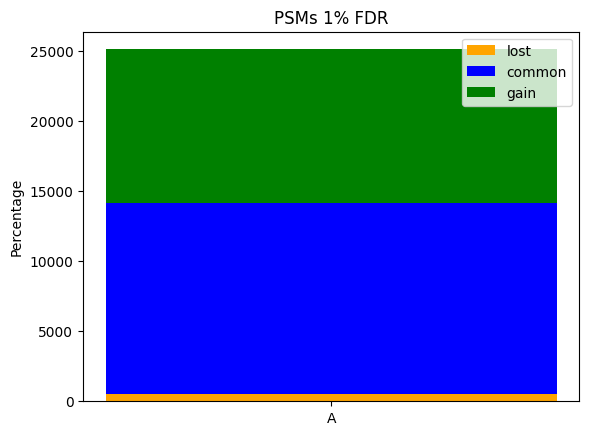

In [130]:
# geeks for geeks
# # create data
x = ['A']
y1 = lost
y2 = shared
y3 = gained
 
# plot bars in stack manner
plt.bar(x, y1, color='orange')
plt.bar(x, y2, bottom=y1, color='b')
plt.bar(x, y3, bottom=y1+y2, color='g')


plt.xlabel("")
plt.ylabel("Percentage")
plt.legend(["lost", "common", "gain"])
plt.title("PSMs 1% FDR")
plt.show()